<a href="https://colab.research.google.com/github/Schrodingercat-tech/Note-Book/blob/main/cifar10_img_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
import cv2
import random as rd

(training_images,training_labels),(testing_images,testing_labels) = datasets.cifar10.load_data()
training_images ,testing_images = training_images/255.,testing_images/255.

class_names = ['plane','car','bird','cat','deer','dog','frog','horse','sheep','truck']

training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

model = models.Sequential()
# hidden Layers
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='softmax'))
# output layer
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=20,validation_data=(testing_images,testing_labels))


Epoch 1/20
625/625 [==============================] - 40s 61ms/step - loss: 2.2049 - accuracy: 0.1605 - val_loss: 2.1330 - val_accuracy: 0.1857
Epoch 2/20
625/625 [==============================] - 33s 53ms/step - loss: 2.0507 - accuracy: 0.1940 - val_loss: 1.9909 - val_accuracy: 0.2195
Epoch 3/20
625/625 [==============================] - 33s 53ms/step - loss: 1.9637 - accuracy: 0.2289 - val_loss: 1.9513 - val_accuracy: 0.2450
Epoch 4/20
625/625 [==============================] - 33s 52ms/step - loss: 1.8731 - accuracy: 0.2842 - val_loss: 1.8327 - val_accuracy: 0.2932
Epoch 5/20
625/625 [==============================] - 34s 55ms/step - loss: 1.7760 - accuracy: 0.3277 - val_loss: 1.7296 - val_accuracy: 0.3363
Epoch 6/20
625/625 [==============================] - 33s 52ms/step - loss: 1.6781 - accuracy: 0.3830 - val_loss: 1.6543 - val_accuracy: 0.3930
Epoch 7/20
625/625 [==============================] - 34s 54ms/step - loss: 1.5495 - accuracy: 0.4564 - val_loss: 1.5077 - val_accuracy:

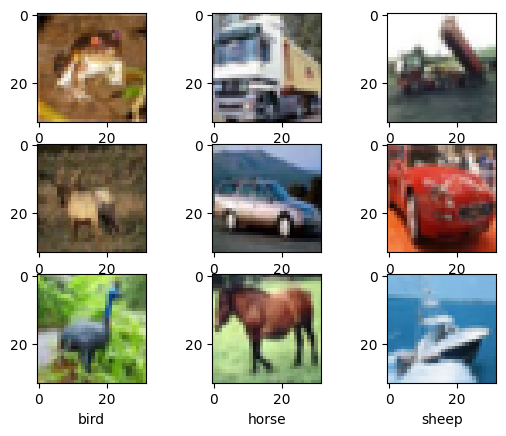

In [54]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(training_images[i])
    plt.xlabel(class_names[training_labels[i][0]])
plt.show()

In [55]:
loss , accuracy = model.evaluate(testing_images,testing_labels)
print(f'loss : {loss}')
print(f'accuracy : {accuracy}')

125/125 [==============================] - 2s 15ms/step - loss: 1.2849 - accuracy: 0.5670
loss : 1.2849289178848267
accuracy : 0.5669999718666077


In [56]:
# save the model
model.save('image_classification.model')

In [57]:
trmodel= models.load_model('/content/image_classification.model')

In [62]:
def rgb(path):
    return cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB)

def reshape(path : str,shape:tuple=(32,32)):
    return cv2.resize(rgb(path),shape)


1/1 [==============================] - 0s 23ms/step
deer


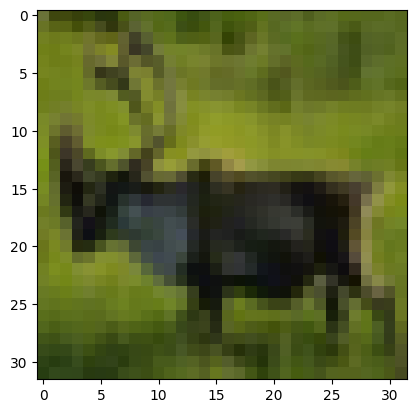

In [119]:
test = rd.randint(0,3999)
yhat = model.predict(np.array([testing_images[test]]))
c = np.argmax(yhat)
print(class_names[c])
plt.imshow(testing_images[test])
plt.show()